## Credit Card Fraud Analytics

!pip install benfordslaw

!pip install imbalanced-learn

!pip install imblearn

In [1]:
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# supress annoying warning message
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
print ('Data shape:' , df.shape)

# class count
class_count_0, class_count_1 = df['Class'].value_counts()

# Separate class
class_0 = df[df['Class'] == 0]
class_1 = df[df['Class'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

Data shape: (284807, 31)
class 0: (284315, 31)
class 1: (492, 31)


In [4]:
# Colours for Genuine (Green) & Fraudulent (Red)
colors = ["#107500", "#AF0000"]

### Classifying Variable: Class 

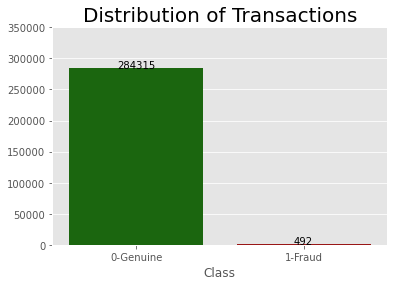

In [5]:
groupedclass=df.groupby('Class').count().reset_index()
g=sns.barplot(x='Class',y='Amount',data=groupedclass, palette=colors)
g.set(ylim=(0,350000))
g.set_xticklabels(['0-Genuine','1-Fraud'])
g.set_title("Distribution of Transactions", fontsize=20)
g.set(ylabel = None)

for index, row in groupedclass.iterrows():
    g.text(row.name,row.Time, round(row.Time,2), color='black', ha="center")

In [6]:
fraud_perc = round(df['Class'].value_counts()[1]/len(df)*100,3)
genuine_perc = round(df['Class'].value_counts()[0]/len(df)*100,3)
print("Fraud Percentage: ", fraud_perc)
print("Genuine Percentage: ",  genuine_perc)

Fraud Percentage:  0.173
Genuine Percentage:  99.827


##### Class: is categorical and the data looks highly imbalanced

Imbalanced data: as only 492 (0.173%) are of class 1 (Fraudulent) and 284315 are of class 0 (Genuine)

In [7]:
# Datasubsets for genuine and fraudulent transactions
genuine_df = df[df['Class']==0]
fraud_df = df[df['Class']==1]

## Exploratory Data Analysis

### Time

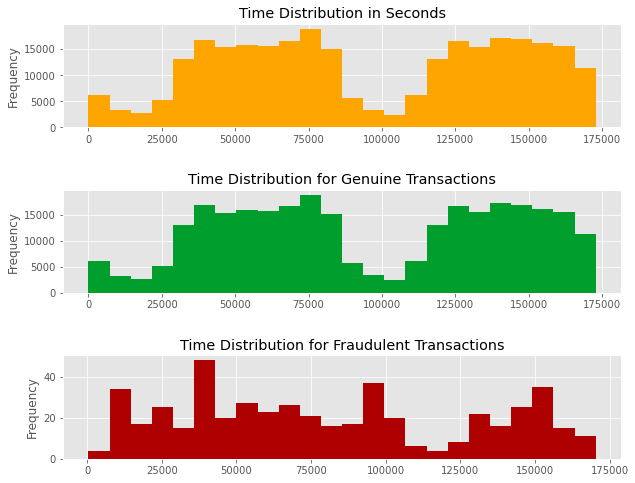

In [8]:
#a. Time in Seconds (raw data) 
plt.figure(figsize=(10,8))

plt.subplot(3, 1, 1)
df['Time'].plot(kind='hist',  bins = 24, title="Time Distribution in Seconds", color='orange') # ALL transactions

plt.subplot(3, 1, 2)
genuine_df["Time"].plot(kind='hist', bins = 24, title="Time Distribution for Genuine Transactions", color = "#009e2d") # genuine

plt.subplot(3, 1, 3)
fraud_df["Time"].plot(kind='hist', bins = 24,title="Time Distribution for Fraudulent Transactions", color = "#AF0000") # fraudulent
plt.subplots_adjust(hspace=0.6)

Time: number of transactions are more when Time is between 30k-80k seconds from first transaction and also between 120k-160ksec

It is clear that based on Time the fradulent transactions are NOT separable from genuine ones

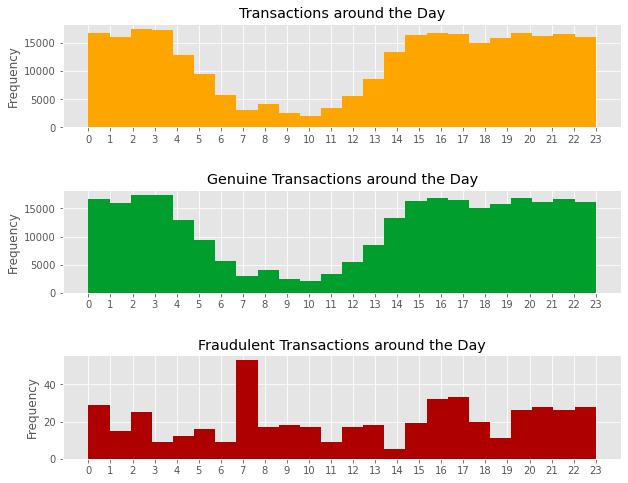

In [9]:
#b. Time in DAY HOURS
import time
from datetime import datetime

df["Hour"] = df["Time"].apply(datetime.fromtimestamp).dt.hour

#Adding Hour col to genuine and fraudulent datasets
genuine_df = df[df['Class']==0]
fraud_df = df[df['Class']==1]

plt.figure(figsize=(10,8))

plt.subplot(3, 1, 1)
df['Hour'].plot(kind='hist',  bins = 24, title="Transactions around the Day", color='orange', xticks=(range(24))) # ALL transactions

plt.subplot(3, 1, 2)
genuine_df["Hour"].plot(kind='hist', bins = 24, title="Genuine Transactions around the Day", color = "#009e2d", xticks=(range(24))) # genuine

plt.subplot(3, 1, 3)
fraud_df["Hour"].plot(kind='hist', bins = 24,title="Fraudulent Transactions around the Day", color = "#AF0000", xticks=(range(24))) # fraudulent
plt.subplots_adjust(hspace=0.6)

It appears that the genuine transactions plunge in the morning hours 7-11 am and their rate increases with the start of the working day.

IN CONTRAST, there is a peak of fraudulent transactions at around 7am that looks unusual. 

In addition, the data for the fraudulent transactions looks more evenly spread.

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,94838.202258,47484.015786,0.0,54230.0,84711.0,139333.0,172792.0
1,492.0,80746.806911,47835.365138,406.0,41241.5,75568.5,128483.0,170348.0


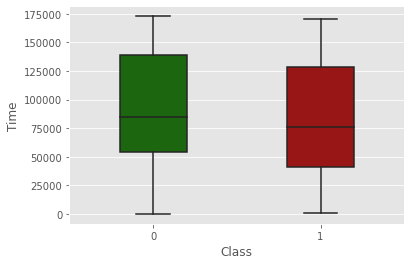

In [10]:
# Boxplot of Time (Seconds) - genuine vs fraudulent
sns.boxplot(x="Class", y="Time",data=df, width=0.4, palette=colors)

#Comparing Stats
df.groupby("Class").Time.describe()

Not much can be inferred!

### Amount

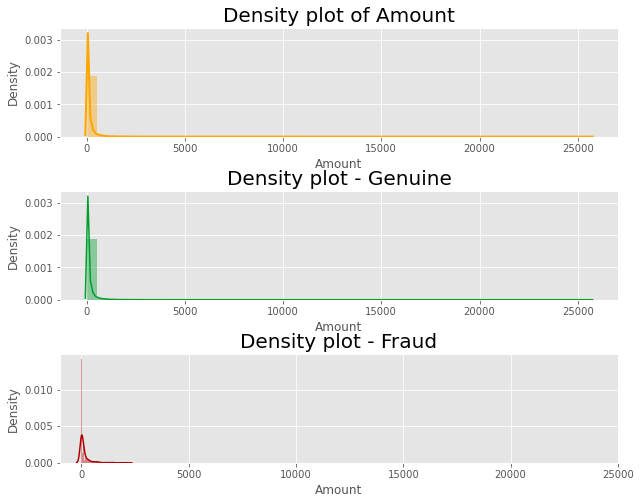

In [11]:
# Density Plot
plt.figure(figsize=(10,8))

plt.subplot(3, 1, 1)
sns.distplot(df['Amount'], hist=True, color = 'orange', kde_kws={'linewidth': 2}) # All transactions
plt.title ('Density plot of Amount', fontsize=20)


plt.subplot(3, 1, 2)
sns.distplot(genuine_df['Amount'], color = "#009e2d", hist = True) # genuine
plt.title ('Density plot - Genuine', fontsize=20)

plt.subplot(3, 1, 3)
sns.distplot(fraud_df['Amount'], color = "#AF0000", hist = True).set(xlim=(-1000,25000)) # fraud
plt.title ('Density plot - Fraud', fontsize=20)
plt.subplots_adjust(hspace=0.5)

Amount is highly skewed. There seem to be lot of 0 transactions in fraud data.

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
0,284315.0,88.291022,250.105092,0.0,5.65,22.00,77.05,25691.16
1,492.0,122.211321,256.683288,0.0,1.00,9.25,105.89,2125.87


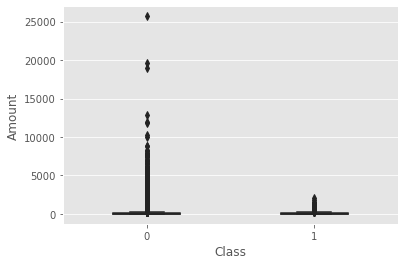

In [12]:
# Boxplot of Amount - genuine vs fraudulent
sns.boxplot(x="Class", y="Amount",data=df, width=0.4, palette=colors)
# plt.ylim(-20, 200)

# Comparing Stats
df.groupby("Class").Amount.describe()

Maximum fraud transaction amount is 2125.87 and minimum is zero. Although genuine transaction's mean is only 88, its maximum value has been apprx 25k. With these differences it is interesting to note that the mean of fraudulent data is higher that the genuine one!!

Text(0.5, 1.0, 'Scatter plot - Amount')

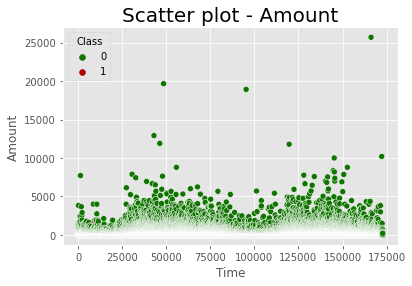

In [13]:
# Sctterplot of Amount against Time
sns.scatterplot( data=df, hue="Class", x= 'Time', y="Amount", palette=colors)
plt.title ('Scatter plot - Amount', fontsize=20)

We can hardly see any speck of fraudulent data due to the high imbalancy!

Due to large number of genuine transactions when compared to fraudulent ones, scatter of red dots cannot be seen.

Infact in all above plots we can see the challenge due to this highly imbalanced data.

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=8569.92


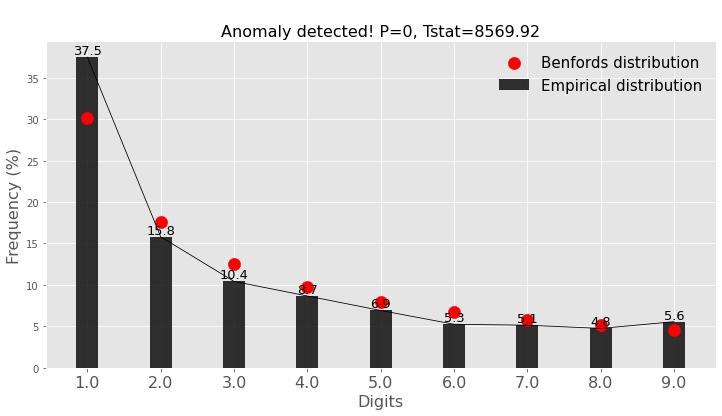

(<Figure size 864x432 with 1 Axes>,
 <AxesSubplot:title={'center':'\nAnomaly detected! P=0, Tstat=8569.92'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [14]:
# Benford's Law on Amount
from benfordslaw import benfordslaw

b = benfordslaw(alpha=0.05)
X = df['Amount']  # to be made Int
results = b.fit(X)
b.plot( figsize=(12,6))

37.5% of the times the leading digit is 1 in overall data.

[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=0, Tstat=8513.46
[benfordslaw] >Analyzing digit position: [1]
[benfordslaw] >[chi2] Anomaly detected! P=2.26124e-20, Tstat=111.101


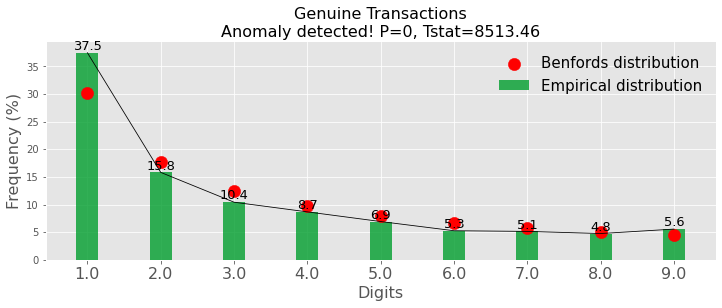

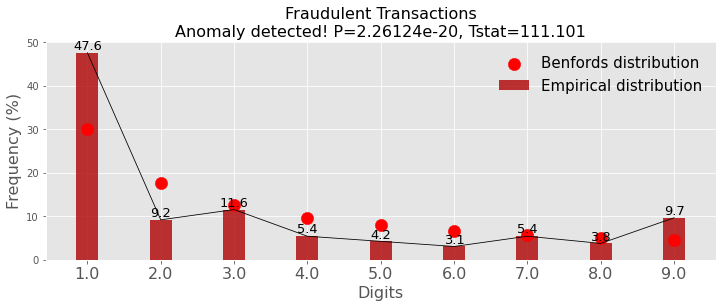

(<Figure size 864x288 with 1 Axes>,
 <AxesSubplot:title={'center':'Fraudulent Transactions\nAnomaly detected! P=2.26124e-20, Tstat=111.101'}, xlabel='Digits', ylabel='Frequency (%)'>)

In [15]:
# Benford's Law on Amount : genuine vs fraudulent data

# for genuine data
bl = benfordslaw(alpha=0.05)
X1 = genuine_df['Amount']  
results = bl.fit(X1)

# for fraudulent dtaa
b2 = benfordslaw(alpha=0.05)
X2 = fraud_df['Amount'] 
results = b2.fit(X2)

bl.plot( figsize=(12,4), barcolor='#009e2d', title='Genuine Transactions')
b2.plot( figsize=(12,4), barcolor='#AF0000', title='Fraudulent Transactions')

It is interesting to note that Amounts of fraudulent data DO NOT TREND with Benford's law. Although the leading didgit is still 1 with 47.6%, in overall the distribution of Amount deviates from Benford's expected distribution

### Principal Components V1, V2, ..., V28

In [16]:
pc_cols= df.iloc[:, 1:31].drop(['Amount'], axis = 1) # PCs & Class

# Comparing Stats
pc_cols.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000
mean,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,1.772925e-15,...,5.126845e-16,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,0.001727
std,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,...,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527
min,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,...,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000
25%,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,...,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000
50%,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,...,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000
75%,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,...,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000
max,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,...,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000


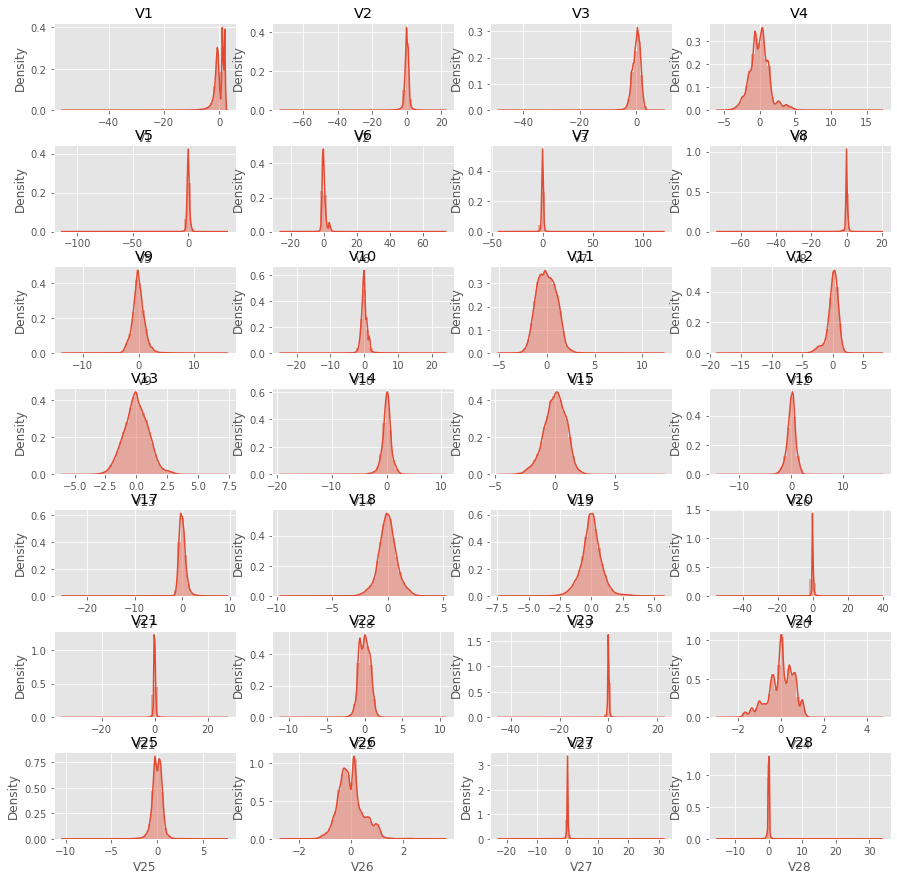

In [17]:
fig, axes = plt.subplots(nrows=7, ncols=4)
axes= axes.flatten()
fig.set_size_inches(15,15)

for ax, col in zip(axes, pc_cols.columns):
    sns.distplot(pc_cols[col], ax=ax)
    ax.set_title(col)
    plt.subplots_adjust(hspace=0.4)

Almost all PCs, except V1, V4 and few others, seem to be normally distributed around 0. But they seem to be skewed and their distribution range varies quite a lot. 

Text(0.5, 1.0, 'Covariance Matrix)')

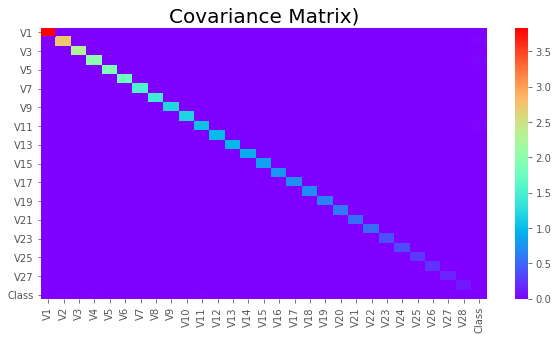

In [18]:
# Covariance between PCs
cov = pc_cols.cov()

plt.figure(figsize=(10,5))
sns.heatmap(cov, cmap='rainbow')
plt.title("Covariance Matrix)", fontsize=20)

V1 has the highest variance. Variance decreases from V1 to V28. But due to imbalnce in the data it is not very clear!

Text(0.5, 1.0, 'Correlation Matrix')

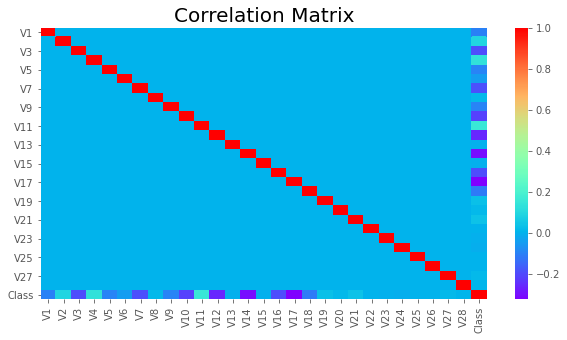

In [19]:
# Correlation between PCs
corr = pc_cols.corr()

plt.figure(figsize=(10,5))
sns.heatmap(corr, cmap='rainbow')
plt.title("Correlation Matrix", fontsize=20)

## Standardisation

In [20]:
from sklearn import preprocessing
df = df.copy()

from sklearn.preprocessing import StandardScaler
scaler_fi= StandardScaler()

# Splitting the independent and dependent variables
independent = df.drop('Class', axis=1)
target = df['Class']


# transform data
indep_vars = list(independent.columns)
df[indep_vars] = scaler_fi.fit_transform(df[indep_vars])

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,...,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964,0,-0.941599
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,...,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475,0,-0.941599
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,...,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686,0,-0.941599
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,...,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534,0,-0.941599
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,...,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403,0,-0.941599


## Feature Selection

We have standardised all the independent variables. 

All PCs may not contain important information. We shall select  PCs which explain most of the variation. 

METHOD to SELECT PCs:
- Kaiser criterion
- Scree plot
- Boxplots
- Correlation -------------------------- taking this ahead!

### Correlation

Text(0.5, 1.0, 'Correlation Matrix')

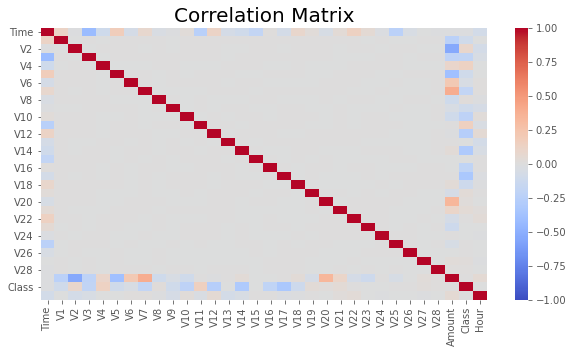

In [21]:
# Correlation matrix of ALL variables (PCs, Time, Amount)
plt.figure(figsize=[10,5])

corr = df.corr()
co = sns.heatmap(corr, vmin=-1, cmap = 'coolwarm')
co.set_title("Correlation Matrix", fontsize=20)

With respect to Class we can see that V3, V4, V7, V10, V11, V12, V14, V16, V17, and V18 show some relation with Class.

V4 & V11 have positive correlation and the rest show negative.

Amount and Time do not show any correlation! Even Hour does not show. Hence we can drop these three as well.

### Selecting PCs

In [22]:
# Select PCs with higher correlation (positive or negative) (threshold of 0.125)
corr = df.corr()
corr = corr[['Class']]
corr

#positive correlations (> 0.125)
print ("Positively Correlated : \n", corr[corr.Class > 0.125])

#negative correlations (<-0.125)
print ("Negatively Correlated : \n", corr[corr.Class < -0.125])

Positively Correlated : 
           Class
V4     0.133447
V11    0.154876
Class  1.000000
Negatively Correlated : 
         Class
V3  -0.192961
V7  -0.187257
V10 -0.216883
V12 -0.260593
V14 -0.302544
V16 -0.196539
V17 -0.326481


### Boxplots of selected PCs

<AxesSubplot:xlabel='Class', ylabel='V11'>

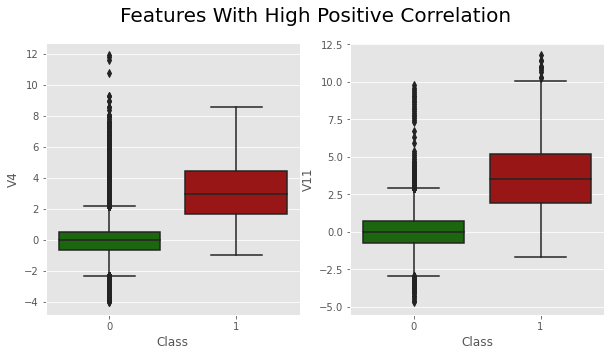

In [23]:
# Understanding the Positively Correlated PCs
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

f.suptitle('Features With High Positive Correlation', fontsize=20)
sns.boxplot(x="Class", y="V4", data=df, palette=colors, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=df, palette=colors, ax=axes[1])

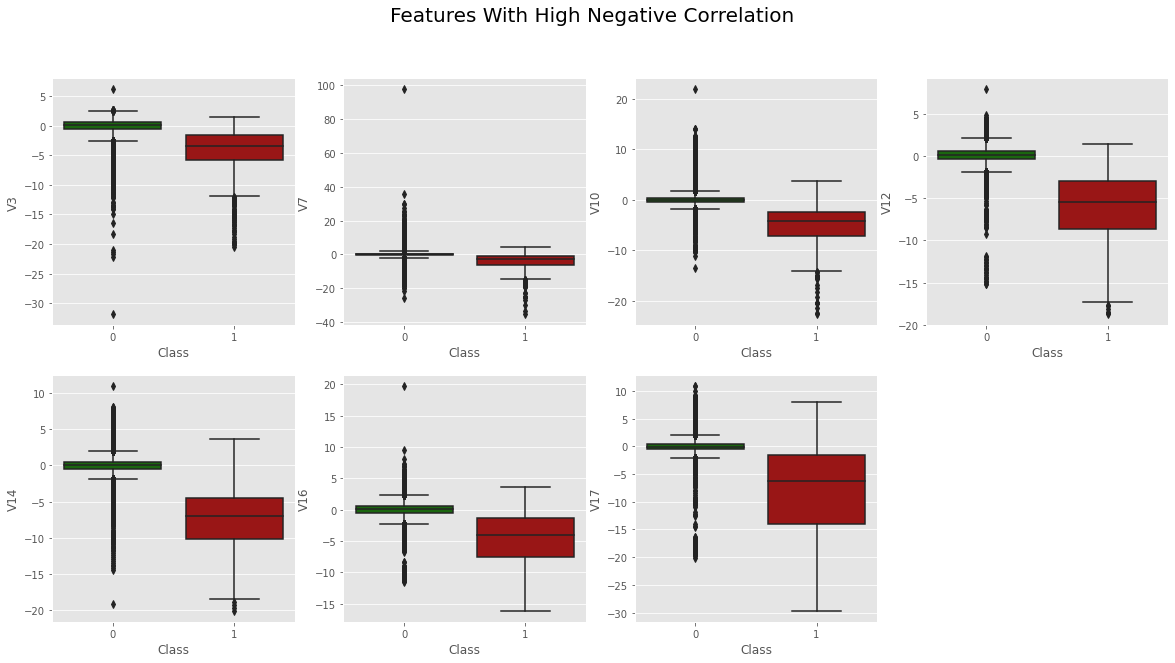

In [24]:
# Understanding the Negatively Correlated PCs
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(20,10))

f.suptitle('Features With High Negative Correlation', size=20)
sns.boxplot(x="Class", y="V3", data=df, palette=colors, ax=axes[0,0])
sns.boxplot(x="Class", y="V7", data=df, palette=colors, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=df, palette=colors, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=df, palette=colors, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=df, palette=colors, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=df, palette=colors, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=df, palette=colors, ax=axes[1,2])
f.delaxes(axes[1,3])


We can see lot of outliers!!

## Reduced Dataset (with only selected features)

In [25]:
# Retained only those PCs that have good correlation with Class
reduced_df = df[['V3', 'V4', 'V7', 'V10', 'V11', 'V12', 'V14', 'V16', 'V17', 'Class']]

# genuine and fraudulent datasets with scaled cols
g_red_df = reduced_df[reduced_df['Class']==0]
f_red_df = reduced_df[reduced_df['Class']==1]

print ('Reduced_df shape:', reduced_df.shape)
print ('Genuine_Reduced_df shape:', g_red_df.shape)
print ('Fraud_Reduced_df shape:', f_red_df.shape)

Reduced_df shape: (284807, 10)
Genuine_Reduced_df shape: (284315, 10)
Fraud_Reduced_df shape: (492, 10)


We can see that the difference and distance between most of teh fraudulent and genuine transactions.

### 2. Over Sampling (with SMOTE)

In [26]:
# SMOTE (after selecting features)
from imblearn.over_sampling import SMOTE
from collections import Counter

# select the used columns from the features dataframe
df_X = reduced_df.drop(['Class'], axis=1)
df_y = reduced_df['Class']

sm = SMOTE(random_state=2)
X_smote, y_smote = sm.fit_resample(df_X,df_y)

print ('Fraud Dataset Before: ', len(df_y))
print ('Fraud Dataset After: ', len(y_smote))

Fraud Dataset Before:  284807
Fraud Dataset After:  568630


In [27]:

print("Before OverSampling, counts of label '1': {}".format(sum(df_y == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(df_y == 0)))

Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



In [28]:
#sm = SMOTE(random_state = 2)
#X_smote, y_smote = sm.fit_resample(df_X, df_y.ravel())
  
print('After OverSampling, the shape of X_smote: {}'.format(X_smote.shape))
print('After OverSampling, the shape of y_smote: {} \n'.format(y_smote.shape))
  
print("After OverSampling, counts of label '1': {}".format(sum(y_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_smote == 0)))

After OverSampling, the shape of X_smote: (568630, 9)
After OverSampling, the shape of y_smote: (568630,) 

After OverSampling, counts of label '1': 284315
After OverSampling, counts of label '0': 284315


In [29]:
len(X_smote)

568630

In [30]:
len(y_smote)

568630

In [31]:
Over_df = pd.DataFrame(X_smote, columns=df_X.columns)
#y_smote = pd.DataFrame(y_smote, columns=['Class'])
Over_df['Class'] = y_smote
#Over_df = pd.concat([X_smote, y_smote])
print ('Over Sampled Data shape: ', Over_df.shape)

Over Sampled Data shape:  (568630, 10)


In [32]:
Over_df.head()

,V3,V4,V7,V10,V11,V12,V14,V16,V17,Class
0,1.672773,0.973366,0.193679,0.083386,-0.540407,-0.618296,-0.324610,-0.536833,0.244863,0
1,0.109797,0.316523,-0.063700,-0.153350,1.580003,1.066089,-0.149982,0.529434,-0.135170,0
2,1.169468,0.268231,0.639776,0.190700,0.611830,0.066137,-0.173114,-3.298235,1.306868,0
3,1.182516,-0.609727,0.192071,-0.050468,-0.221892,0.178371,-0.300360,-1.209296,-0.805445,0
4,1.021412,0.284655,0.479302,0.691625,-0.806147,0.538627,-1.168034,-0.515205,-0.279081,0


In [33]:
len(Over_df)

568630

In [34]:
X = Over_df.drop('Class', axis=1)
y = Over_df['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

print('X_shapes:\n', 'X_train:', 'X_test:\n', X_train.shape, X_test.shape, '\n') 
print('Y_shapes:\n', 'Y_train:', 'Y_test:\n', y_train.shape, y_test.shape)

X_shapes:
 X_train: X_test:
 (398041, 9) (170589, 9) 

Y_shapes:
 Y_train: Y_test:
 (398041,) (170589,)


## Model Fitting

### 1. With UnderSampled Data - LogR, LDA, KNN, DT, SVM, XGB, RF

In [35]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn


# Data Split
X = trim_df.drop('Class', axis=1)
y = trim_df['Class']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

print('X_shapes:\n', 'X_train:', 'X_test:\n', X_train.shape, X_test.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_test:\n', y_train.shape, y_test.shape)

#### Logistic Regression, Linear Discriminant Analysis, k-Nearest Neighbors, Decision Tree  Support Vector Classification, XG Boost, Random Forest

In [36]:
# Fitting Algorithms

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.svm import SVC
#from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import f1_score


models = []

models.append(('LogR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
#models.append(('SVM', SVC()))
#models.append(('XGB', XGBClassifier()))
models.append(('RF', RandomForestClassifier()))

#comparing models

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    print(name, cv_results.mean())

LogR 0.9827733074261452
LDA 0.9754142901364166
KNN 0.9992146969409644
DT 0.9969687501531859


KeyboardInterrupt: 

In [37]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_predict = rf.predict(X_test)


NameError: name 'accuracy_score' is not defined

In [38]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, log_loss


In [39]:
accuracy_score(y_test, y_predict)

0.9996834496948807

In [40]:
log_loss(y_test, y_predict)

0.01093344769722875

In [ ]:
# Comparing Algorithms on Cross Validation Scores

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms', fontsize=25)
plt.xlabel('Algorithm')
plt.ylabel('Cross-Validn Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

It is very clear from this boxplot that Decision Tress algorithm can be totally ruled out as it has a large deviation.

Logistic Regression and SVM seem to be better fitted than the rest,

## Test Data Prediction

classifiers = [
    LogisticRegression(),
    LinearDiscriminantAnalysis(),
    KNeighborsClassifier(3),
    DecisionTreeClassifier(),
    SVC(kernel="rbf", C=0.025, probability=True),
    XGBClassifier(),
    RandomForestClassifier()]

In [ ]:
# predicting for test data
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, log_loss

log_cols=["Classifier","Cross-Validation Score", "Accuracy Score", "ROC-AUC Score", "Precision Score","Recall Score", "F1 Score", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__

    # Cross-Validation Score
    kfold = KFold(n_splits=10)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    
    # Evaluation Metrics
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions) # Accuracy
    roc_auc = roc_auc_score(y_test, train_predictions) # ROC-AUC Score
    prec = precision_score(y_test, train_predictions) # precision
    rec = recall_score(y_test, train_predictions) # recall
    f1 = f1_score(y_test, train_predictions)# F1 score
                           
        
    # Log Loss    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    
    log_entry = pd.DataFrame([[name, cv_results.mean(), acc, roc_auc, prec, rec, f1, ll]], columns=log_cols)
    log = log.append(log_entry)
    

Clearly Decision Tree does not work here as the loss is way higher!

KNN fits with highest accuracy but its prediction probability (log loss) is lesser than the rest of the models (except Decision Tree ofcourse).

Trading off between log loss and accuracy, Logistic Regression seems to be good to go ahead.